**加粗文字**# 边缘检测

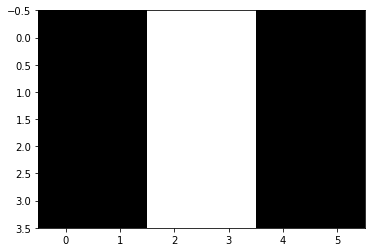

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


imgSize = (4, 6, 3)
# 黑像素值 0，白像素值 255
img = np.zeros(imgSize, dtype = int)
img.transpose(2,1,0)
img[:,2:4,:] = 255
plt.imshow(img)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


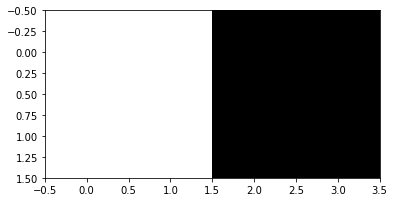

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



def filter2D(img, k):
    High, Width, Channel = img.shape
    kSize = k.shape[0]
    # 零填充，stride = 1
    pad = 0
    value = np.zeros((High-kSize+1, Width-kSize+1), dtype=np.float)
    # 相乘的过程，也是卷积
    for y in range(value.shape[1]):
        for x in range(value.shape[0]):
            value[x, y] = np.sum(img[x:x+kSize, y:y+kSize, 0] * k)
    value[value > 255] = 255
    value[value < 0] = 0
    result = np.repeat(value[:, :, np.newaxis], 3, axis=2)
    return result


# x 方向的模板
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
# y 方向的模板
# kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
result = filter2D(img, kernel)
plt.imshow(result)
plt.show()

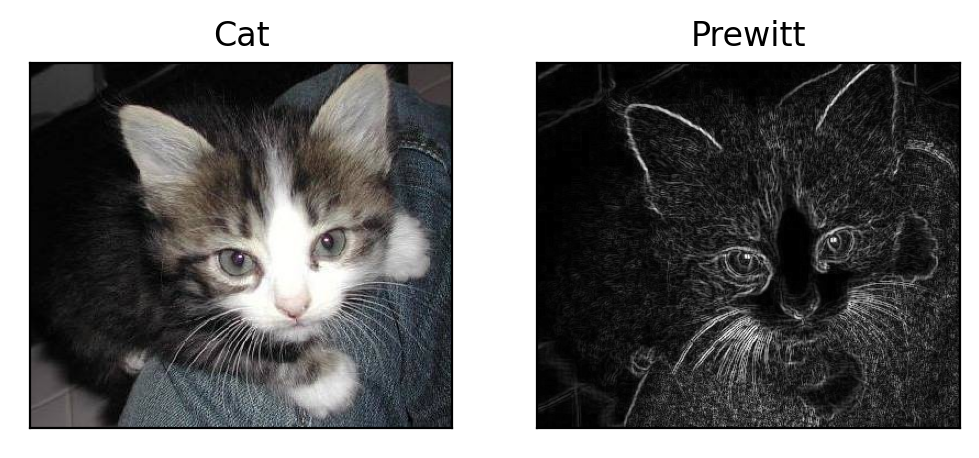

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# 读取图像猫
img = cv.imread('/content/drive/MyDrive/img/cat.png', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# 灰度化处理图像
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# 实现Prewitt 算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)


x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)


# 转 uint8 ,图像融合
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Prewitt = cv.addWeighted(absX, 0.5, absY, 0.5, 0)


# 显示原图和检测到边缘的图像
titles = ['Cat', 'Prewitt']
images = [rgb_img, Prewitt]
# 设置分辨率200
plt.rcParams['figure.dpi'] = 200


for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
# plt.savefig('cat_prewitt.png', dpi=200)

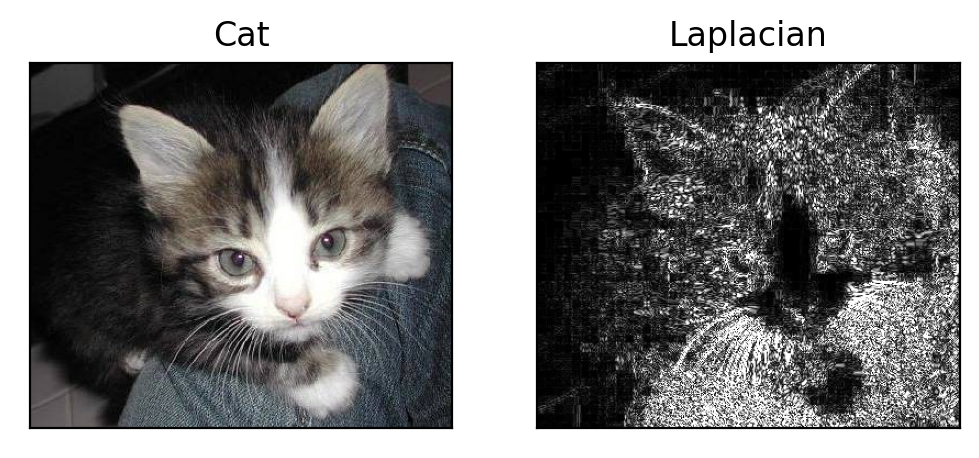

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt


# 读取图像猫
img = cv.imread('/content/drive/MyDrive/img/cat.png', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# 灰度化处理图像
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# 使用 Laplacian 算子
dst = cv.Laplacian(grayImage, cv.CV_16S, ksize = 3)
Laplacian = cv.convertScaleAbs(dst)


# 显示原图和检测到边缘的图像
titles = ['Cat', 'Laplacian']
images = [rgb_img, Laplacian]


# 分辨率
plt.rcParams['figure.dpi'] = 200


for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
#plt.savefig('cat_Laplacian.png', dpi=200)

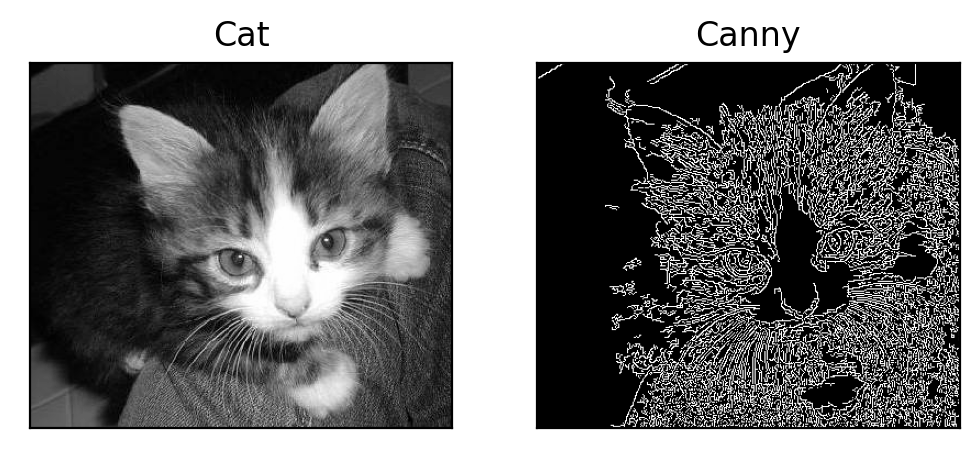

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt


# 读取灰度图像
img = cv.imread('/content/drive/MyDrive/img/cat.png', 0)
edges = cv.Canny(img, 50, 150)


# 分辨率
plt.rcParams['figure.dpi'] = 200
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Cat'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])


plt.show()
# plt.savefig('Cat_Canny.png', dpi=200)